Import Libraries

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


Import pretrained EfficientNet model.

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
effnet = EfficientNetB0(weights = "imagenet",include_top = False,input_shape=(150,150,3))

Add Pooling, Dropout, & output Layer to the model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPooling2D,GlobalAveragePooling2D,Dropout
model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(2,activation='softmax')(model)

classifier = Model(inputs = effnet.input, outputs = model)  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model Summary

In [ ]:
classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 150, 150, 3)  0           ['normalization[0][0]']      

Fit the model to the data

In [ ]:
# Part 2 - Fitting the CNN to the images
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Load data

In [ ]:
vehicle_dir = "/content/drive/MyDrive/Vehicle detection/Vehicle1/vehicles"
nonvehicle_dir = "/content/drive/MyDrive/Vehicle detection/non_vehicle1/non-vehicles"
vehicle = os.listdir("/content/drive/MyDrive/Vehicle detection/Vehicle1/vehicles")
non_vehicle = os.listdir("/content/drive/MyDrive/Vehicle detection/non_vehicle1/non-vehicles")

print(f"Number of Vehicle Images: {len(vehicle)}")
print(f"Number of Non Vehicle Images: {len(non_vehicle)}")

Number of Vehicle Images: 8792
Number of Non Vehicle Images: 8968


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Print random images from data with initial labels

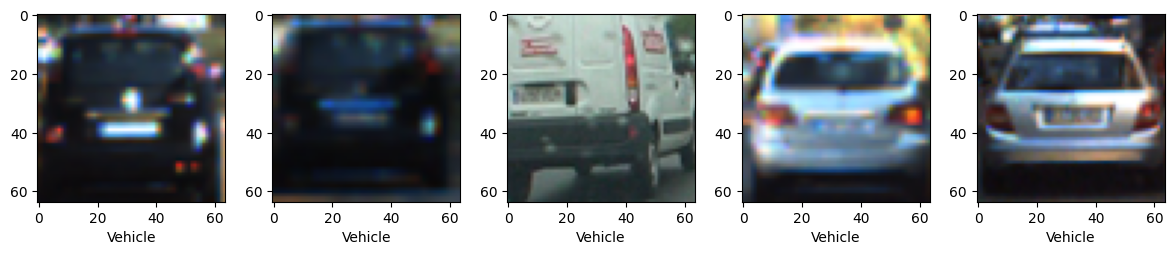

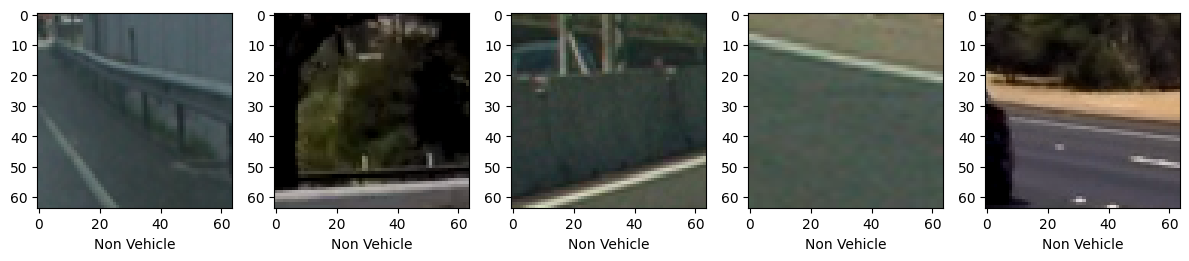

In [ ]:
plt.figure(figsize=(12,9))
import cv2
vehicle_img = np.random.choice(vehicle,5)
nonvehicle_img = np.random.choice(non_vehicle,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    img = cv2.imread(vehicle_dir+'/'+vehicle_img[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel("Vehicle")
    #plt.axis("off")
    plt.tight_layout()
    plt.imshow(img)
plt.show()
plt.figure(figsize=(12,9))
for i in range(5):
    plt.subplot(1,5,i+1)
    img = cv2.imread(nonvehicle_dir+'/'+nonvehicle_img[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel("Non Vehicle")
    #plt.axis("off")
    plt.imshow(img)
plt.tight_layout()
plt.show()

Imag epreprocessing & preparation of training dataset

In [ ]:
train = []
label = []
import tqdm
from tensorflow.keras.preprocessing import image

for i in tqdm.tqdm(vehicle):
    img = cv2.imread(vehicle_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    train.append(img)
    label.append("Vehicle")

for i in tqdm.tqdm(non_vehicle):
    img = cv2.imread(nonvehicle_dir+'/'+ i)
    img = cv2.resize(img,(150,150))
    train.append(img)
    label.append("Non Vehicle")

100%|██████████| 8968/8968 [00:17<00:00, 503.70it/s]


In [ ]:
train = np.array(train)
label = np.array(label)
train.shape,label.shape

((17760, 150, 150, 3), (17760,))

Configuration of training dataset

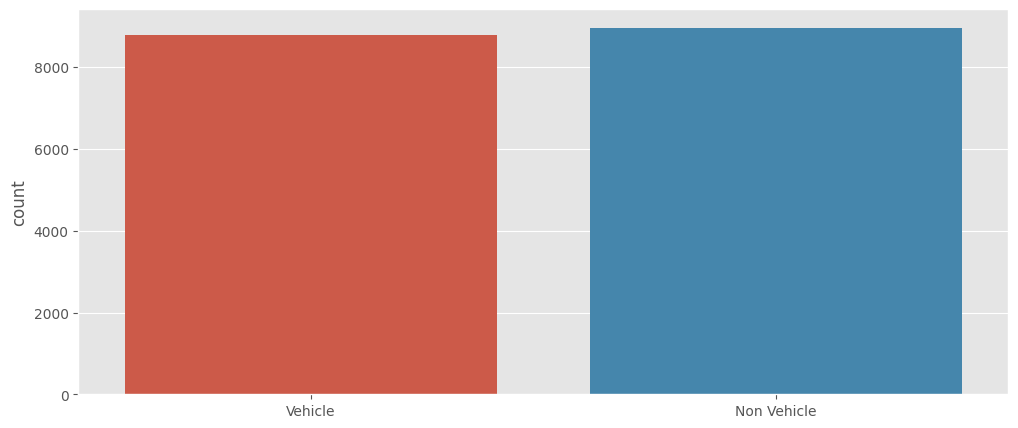

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(12,5))
sns.countplot(x = label)
plt.show()

Apply label encoder to label (convert category to numerical)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
le = LabelEncoder()
label= le.fit_transform(label)

In [ ]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
label = to_categorical(label)
print(label.shape)
train,label = shuffle(train, label)

(17760, 2)


Split the data into train & test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,label,test_size=0.2,random_state = 42)

Apply the model

In [ ]:
result=classifier.fit(x_train, y_train,
                         epochs=10, # iteration or repeat
                         validation_data=(x_test, y_test))

Epoch 1/10
444/444 [==============================] - 1104s 2s/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 9.8945e-04 - val_accuracy: 1.0000
Epoch 2/10
444/444 [==============================] - 1084s 2s/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0263 - val_accuracy: 0.9927
Epoch 3/10
444/444 [==============================] - 1105s 2s/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0023 - val_accuracy: 0.9989
Epoch 4/10
444/444 [==============================] - 1102s 2s/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0016 - val_accuracy: 0.9994
Epoch 5/10
444/444 [==============================] - 1103s 2s/step - loss: 0.0042 - accuracy: 0.9981 - val_loss: 0.0029 - val_accuracy: 0.9986
Epoch 6/10
444/444 [==============================] - 1102s 2s/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0014 - val_accuracy: 0.9992
Epoch 7/10
444/444 [==============================] - 1105s 2s/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0019 - val_accur

In [ ]:
classifier.evaluate(x_test,y_test)

111/111 [==============================] - 63s 570ms/step - loss: 0.0033 - accuracy: 0.9989


[0.00325753609649837, 0.9988738894462585]

Prediction on test data

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

111/111 [==============================] - 64s 561ms/step


array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
y_test = np.argmax(y_test,axis=1)
y_test[:15]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

Classification report on performance of model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1805
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      3552
   macro avg       1.00      1.00      1.00      3552
weighted avg       1.00      1.00      1.00      3552



Confusion matrix report

(<Figure size 800x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

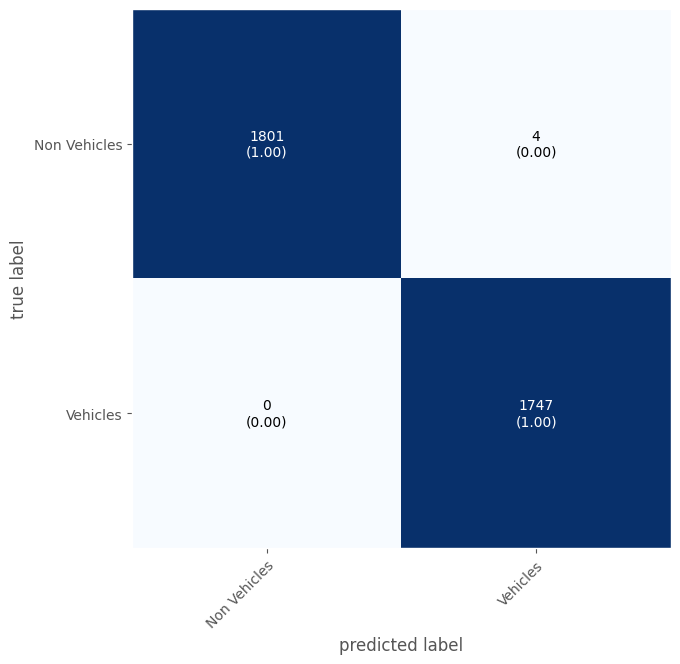

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names =['Non Vehicles', 'Vehicles'],
                     show_normed = True)

Model Accuracy & loss

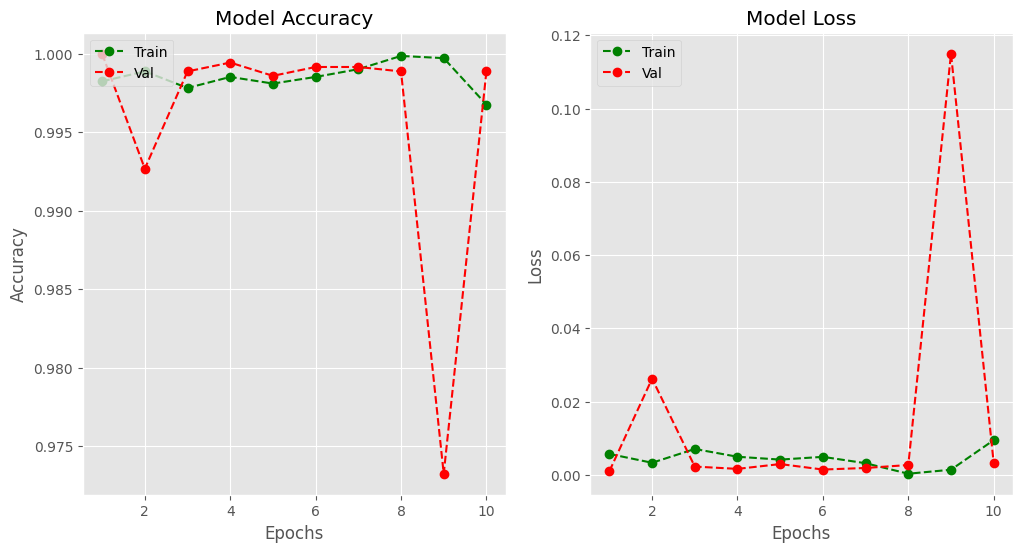

In [ ]:
plt.figure(figsize = (12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,result.history['accuracy'],'go--')
plt.plot(epochs,result.history['val_accuracy'],'ro--')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Val'],loc ='upper left')

plt.subplot(1,2,2)
plt.plot(epochs,result.history['loss'],'go--')
plt.plot(epochs,result.history['val_loss'],'ro--')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Val'],loc ='upper left')
plt.show()

Sample examples of model's predictions vs actual label of images

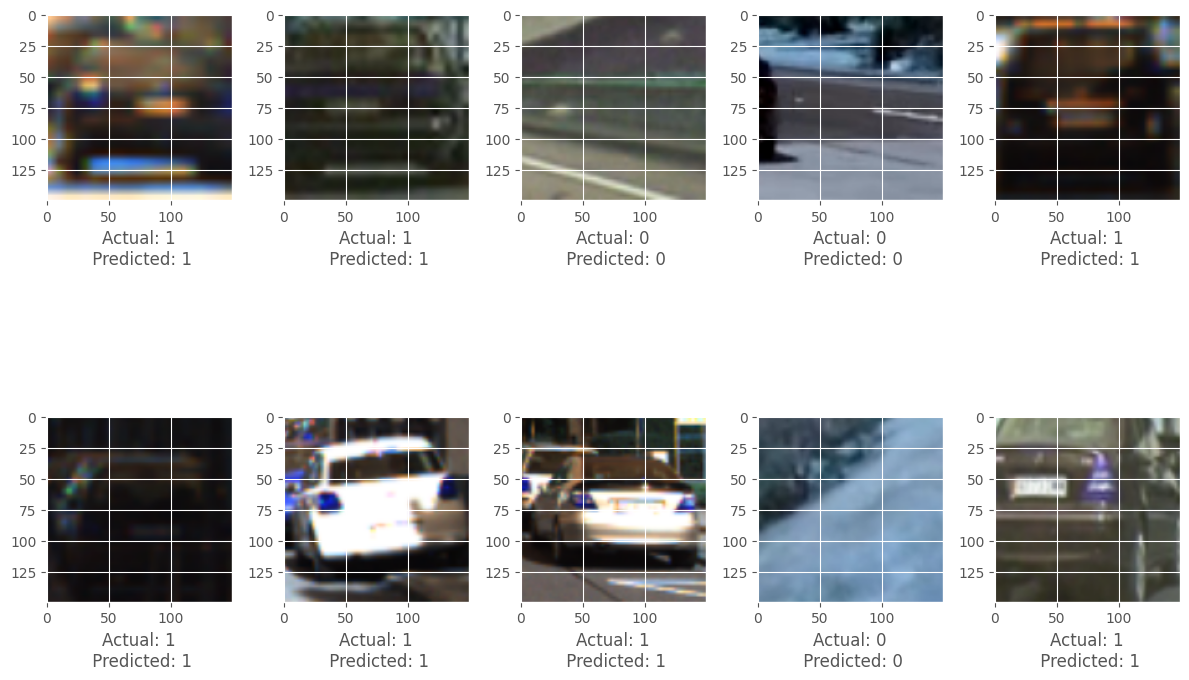

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = np.random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test[sample_idx]}\n Predicted: {y_pred[sample_idx]}")

plt.tight_layout()
plt.show()